In [1]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using MURK genes to plot cell velocity

In [29]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [30]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
load_raw_data = pd.read_csv(raw_data_path)

# combine detail
# detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes'
# path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
# load_cellDancer=pd.DataFrame()
# for i in range(1,11):
#     detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
#     detail=pd.read_csv(detail_path)
#     load_cellDancer=load_cellDancer.append(detail)
# load_cellDancer_bkup=load_cellDancer.copy()
detail_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/sample_genes/gastrulationMURK_same_para_as_pastepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTnormalavgCWin10p3smoW0.1binFalse/detail_e200.csv'
load_cellDancer=pd.read_csv(detail_path)
    
load_cellDancer.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
load_cellDancer = load_cellDancer.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape



In [31]:
load_cellDancer

cellIndex gene_name        s0        u0        s1        u1     alpha  \
308225          0    Abcb10  0.911334  0.101550  1.064736  0.076091  0.061884   
308226          1    Abcb10  0.883598  0.118085  1.063294  0.088186  0.069043   
308227          2    Abcb10  0.740979  0.054751  0.818332  0.047157  0.057296   
308228          3    Abcb10  0.784798  0.191707  1.077897  0.142675  0.099771   
308229          4    Abcb10  0.630851  0.107859  0.793176  0.087012  0.084037   
...           ...       ...       ...       ...       ...       ...       ...   
456168      12324     Tmod1  0.967206  0.080546  1.167334  0.045823  0.000564   
456169      12325     Tmod1  0.868049  0.077189  1.059217  0.044136  0.000652   
456170      12326     Tmod1  0.824773  0.118791  1.117875  0.069602  0.001951   
456171      12327     Tmod1  0.897459  0.108400  1.166076  0.062899  0.001357   
456172      12328     Tmod1  1.009334  0.073992  1.193101  0.041806  0.000413   

            beta     gamma      cost  
308225  0.420117  0.089046  0.122952  
308226  0.416127  0.091173  0.122952  
308227  0.420735  0.090830  0.122952  
308228  0.401718  0.098193  0.122952  
308229  0.406003  0.098952  0.122952  
...          ...       ...       ...  
456168  0.178841  0.047673  0.106126  
456169  0.177708  0.048800  0.106126  
456170  0.172200  0.051362  0.106126  
456171  0.174381  0.050084  0.106126  
456172  0.180397  0.046639  0.106126  

[752069 rows x 10 columns]

In [32]:

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/sample_genes/gastrulationMURK_same_para_as_pastepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTnormalavgCWin10p3smoW0.1binFalse/cell_velocity'

In [33]:
# load musk genes
musk_genes=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/MUSK_genes/13059_2021_2414_MOESM3_ESM.csv')
load_raw_data=load_raw_data[load_raw_data.gene_list.isin(musk_genes['index'])].reset_index(drop=True)
load_cellDancer=load_cellDancer[load_cellDancer.gene_name.isin(musk_genes['index'])].reset_index(drop=True)

In [36]:
load_cellDancer

cellIndex gene_name        s0        u0        s1        u1     alpha  \
0               0    Abcb10  0.911334  0.101550  1.064736  0.076091  0.061884   
1               1    Abcb10  0.883598  0.118085  1.063294  0.088186  0.069043   
2               2    Abcb10  0.740979  0.054751  0.818332  0.047157  0.057296   
3               3    Abcb10  0.784798  0.191707  1.077897  0.142675  0.099771   
4               4    Abcb10  0.630851  0.107859  0.793176  0.087012  0.084037   
...           ...       ...       ...       ...       ...       ...       ...   
752064      12324     Tmod1  0.967206  0.080546  1.167334  0.045823  0.000564   
752065      12325     Tmod1  0.868049  0.077189  1.059217  0.044136  0.000652   
752066      12326     Tmod1  0.824773  0.118791  1.117875  0.069602  0.001951   
752067      12327     Tmod1  0.897459  0.108400  1.166076  0.062899  0.001357   
752068      12328     Tmod1  1.009334  0.073992  1.193101  0.041806  0.000413   

            beta     gamma      cost  
0       0.420117  0.089046  0.122952  
1       0.416127  0.091173  0.122952  
2       0.420735  0.090830  0.122952  
3       0.401718  0.098193  0.122952  
4       0.406003  0.098952  0.122952  
...          ...       ...       ...  
752064  0.178841  0.047673  0.106126  
752065  0.177708  0.048800  0.106126  
752066  0.172200  0.051362  0.106126  
752067  0.174381  0.050084  0.106126  
752068  0.180397  0.046639  0.106126  

[752069 rows x 10 columns]

In [24]:
len(set(load_cellDancer.gene_name))

61

In [35]:
def tune_cell_velocity_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_list in color_list_full:
                                            colors = {
                                            'Haematoendothelial progenitors':color_list[0],
                                            'Blood progenitors 1':color_list[1],
                                            'Blood progenitors 2':color_list[2],
                                            'Erythroid1':color_list[3],
                                            'Erythroid2':color_list[4],
                                            'Erythroid3':color_list[5]}

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)
                                            save_path = output_path
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            # try:
                                            vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3)
                                            # except:
                                                # print("Exception: "+file_name_additional_info)

------n_neighbors10
------add_amt_gene61
neighbors
tranfer mode: power10
using gene mode
(61, 12329)
(61, 12329)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


4.04424623673532
0.6906665710493576
0.17077757649269443


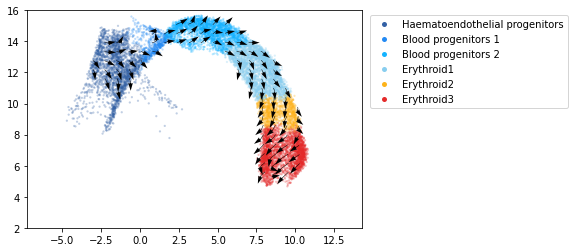

In [37]:
# we finally choose mode='gene', transfer mode='power10'

n_neighbors_list=[10]
add_amt_gene_list=[61]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[15]
grid_step_list=[20]

color_list_full=[solarExtra02]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)



In [10]:
load_cellDancer

Unnamed: 0 gene_name         s0        u0         s1        u1  \
0                0   Tmem14c   6.134423  0.000000   6.127763  0.000155   
1                1   Tmem14c   3.959351  0.011332   5.021295  0.007473   
2                2   Tmem14c   4.587558  0.024266   6.830238  0.015952   
3                3   Tmem14c  10.215733  0.000000  10.204616  0.000116   
4                4   Tmem14c   6.937787  0.010030   7.888807  0.006527   
...            ...       ...        ...       ...        ...       ...   
752064       12324  Cdc42ep3   1.337374  0.019778   1.326423  0.018792   
752065       12325  Cdc42ep3   1.284110  0.055488   1.333090  0.050081   
752066       12326  Cdc42ep3   1.327672  0.028023   1.330601  0.025993   
752067       12327  Cdc42ep3   1.413938  0.030860   1.417507  0.028498   
752068       12328  Cdc42ep3   1.454414  0.000000   1.406328  0.001497   

           alpha      beta     gamma      cost  index  
0       0.002682  0.086057  0.064715  0.106703      0  
1       0.004559  0.083805  0.065165  0.106703      1  
2       0.006503  0.082497  0.065760  0.106703      2  
3       0.002011  0.087536  0.064870  0.106703      3  
4       0.003527  0.085124  0.065206  0.106703      4  
...          ...       ...       ...       ...    ...  
752064  0.022176  0.032314  0.118595  0.060334  12324  
752065  0.020045  0.031735  0.119561  0.060334  12325  
752066  0.021495  0.032153  0.118871  0.060334  12326  
752067  0.020578  0.031501  0.119391  0.060334  12327  
752068  0.022850  0.032060  0.118406  0.060334  12328  

[752069 rows x 11 columns]

Exception: Klf3
Exception: Hsd3b6


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/velocity_plot.py:438: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(None,(6,6))


Exception: Ssbp2
Exception: Grap2
Exception: Hesx1
Exception: Txlng
Exception: Rmnd5b
Exception: Klhl26
Exception: Ucp2
Exception: Lpcat1
Exception: Top1mt
Exception: Cdkn3
Exception: Dnaja4
Exception: Arrb1
Exception: Cldn13
Exception: Ddias
Exception: Aqp3
Exception: Acp1
Exception: Ddc
Exception: Gadd45a
Exception: Fam126a
Exception: Efcab2
Exception: Ypel3
Exception: Hbq1b
Exception: Mindy2
Exception: Fuca2
Exception: Kdm7a
Exception: Htatip2


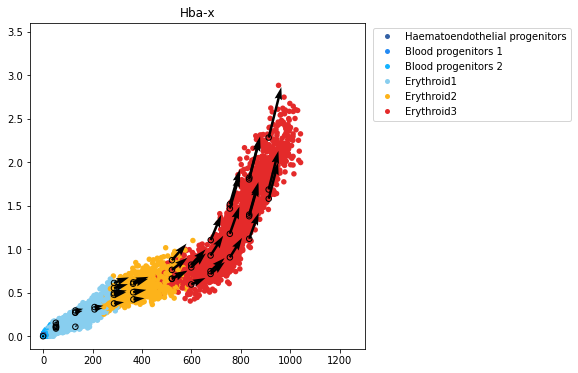

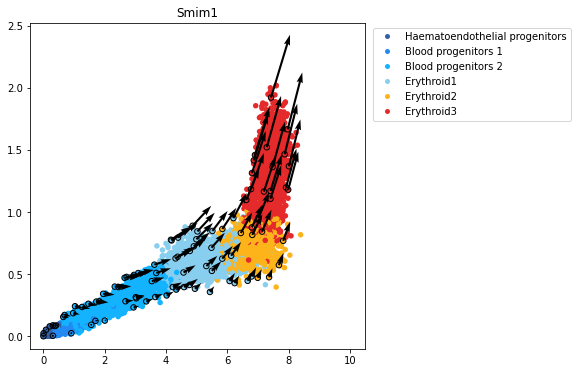

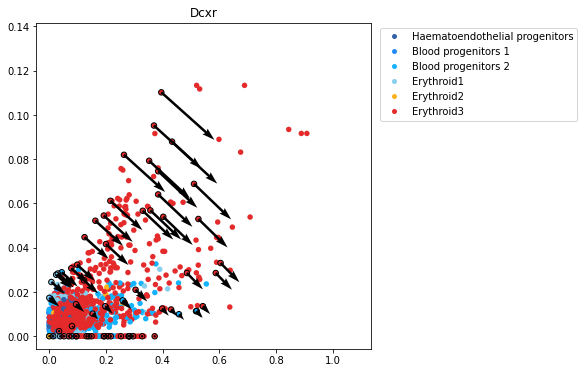

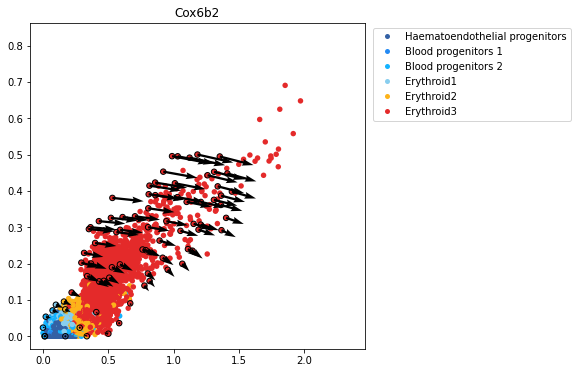

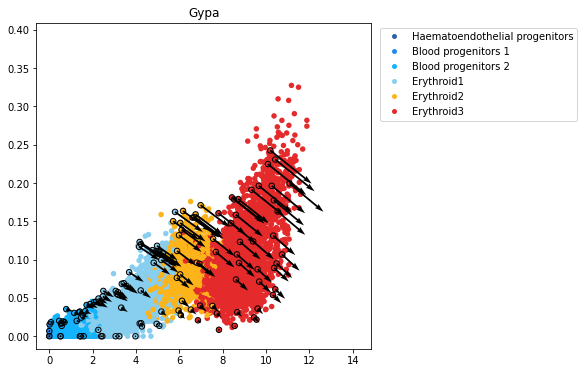

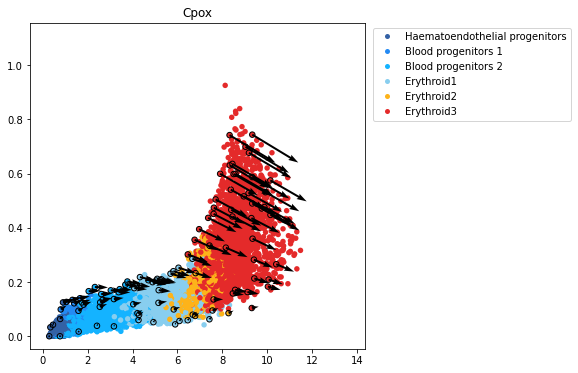

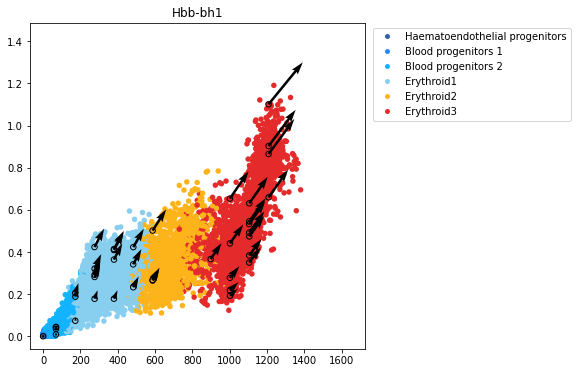

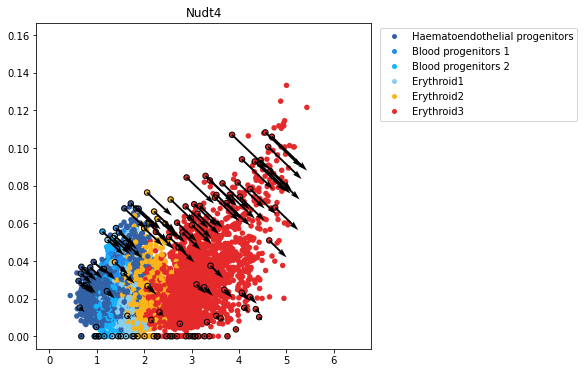

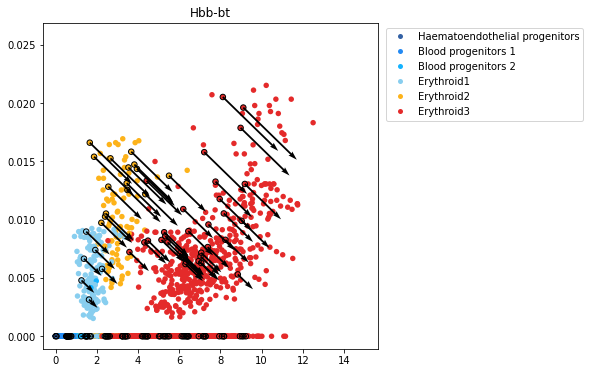

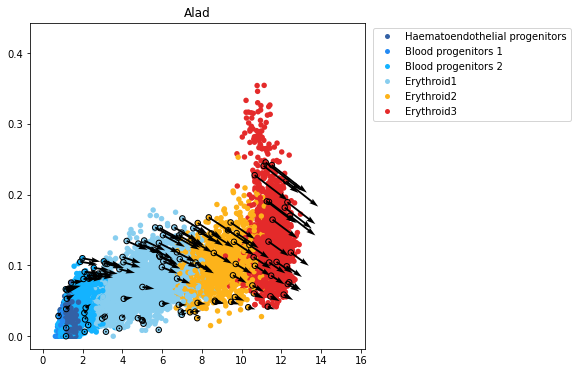

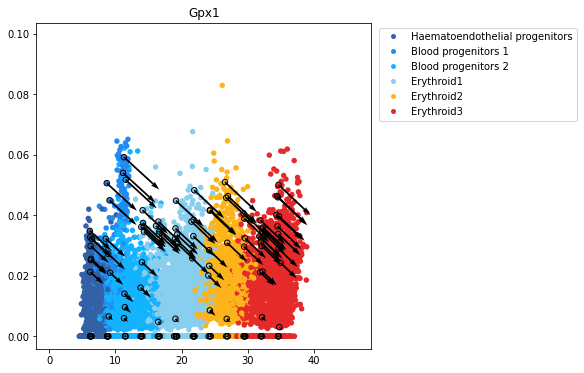

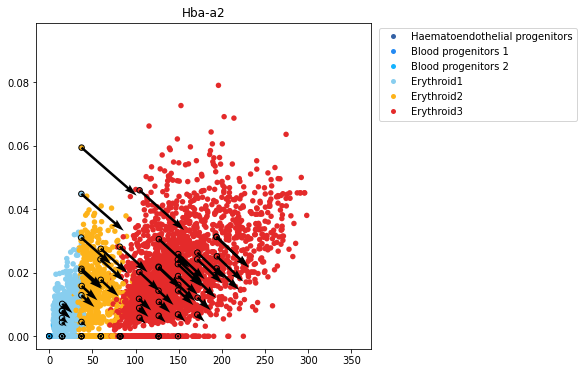

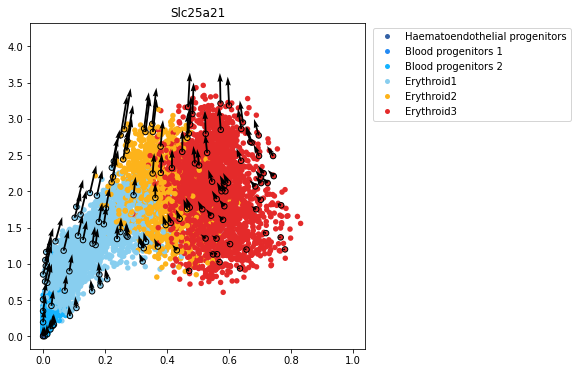

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

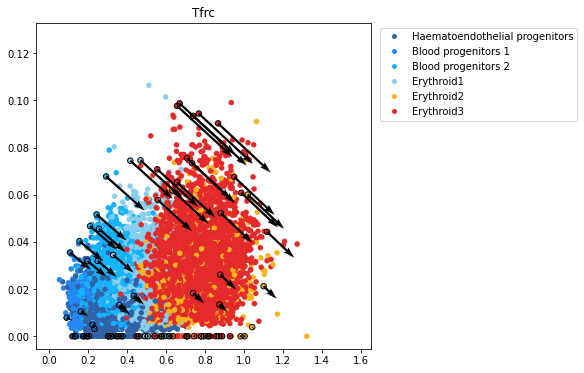

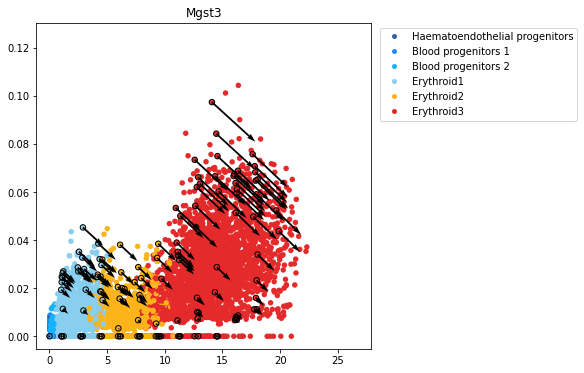

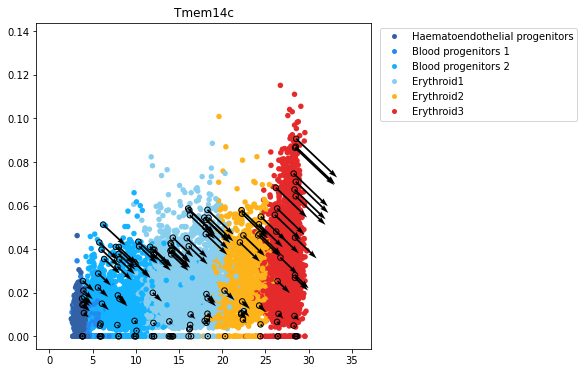

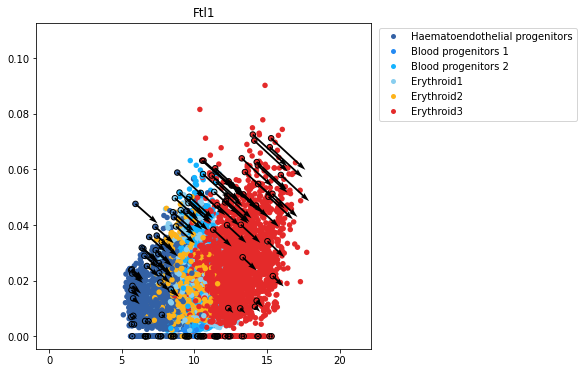

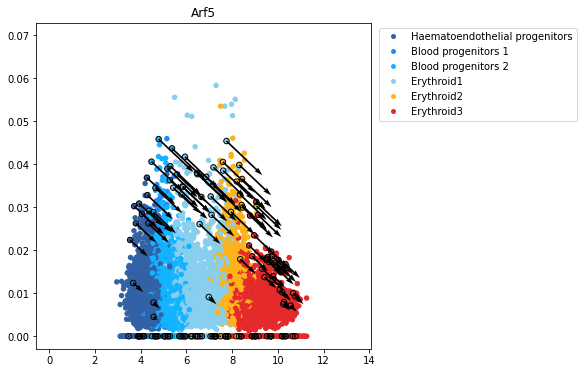

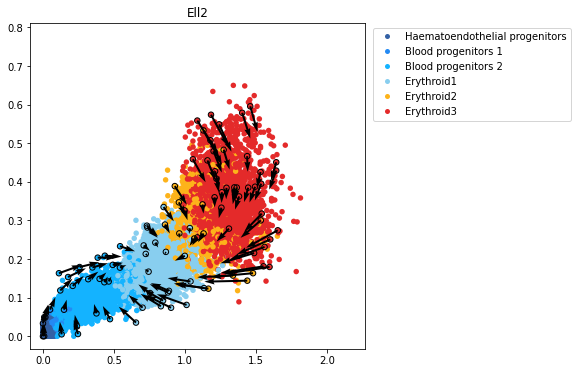

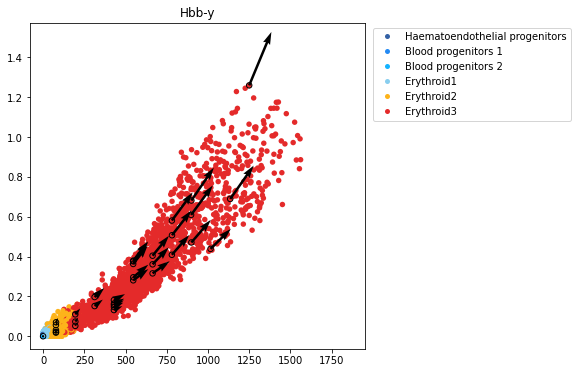

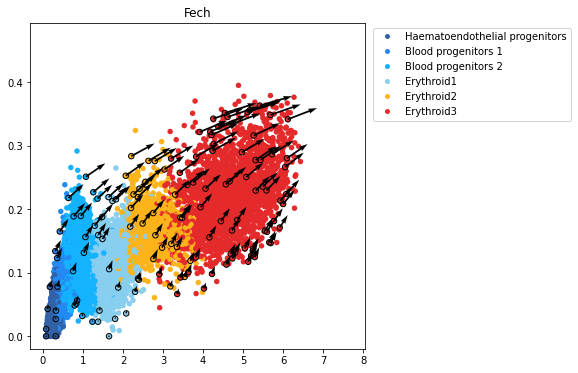

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

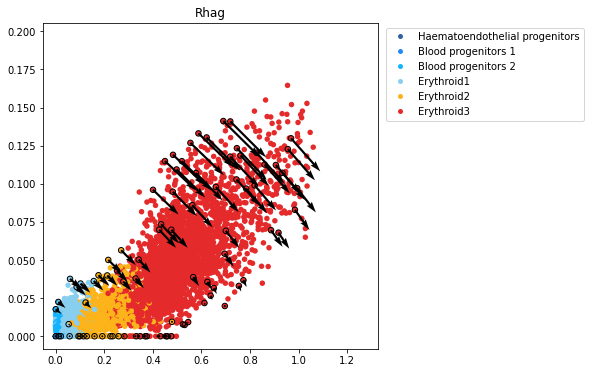

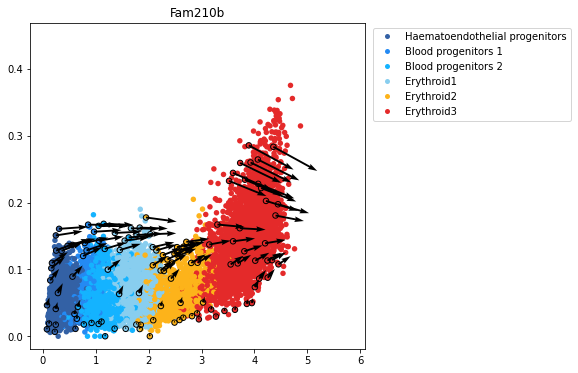

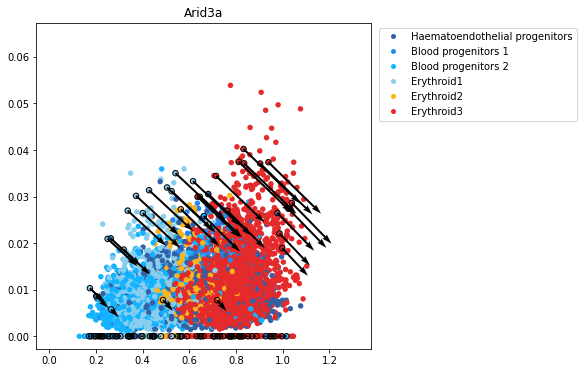

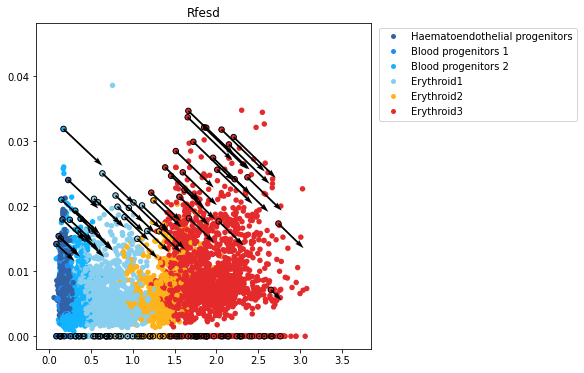

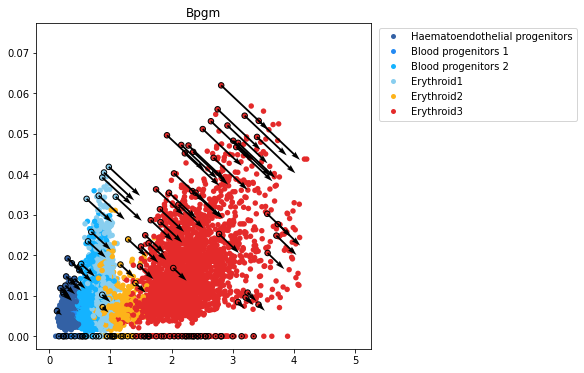

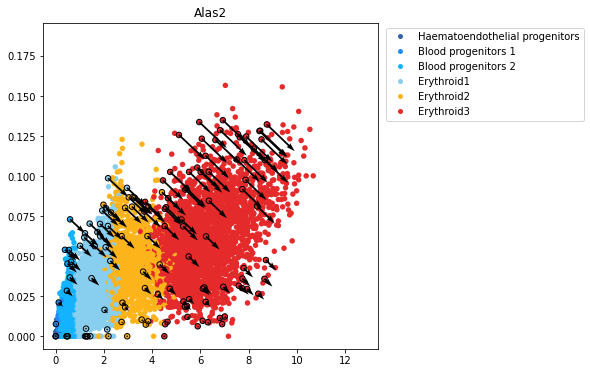

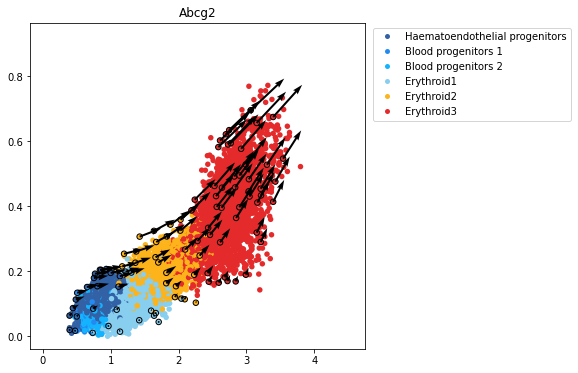

<Figure size 432x432 with 0 Axes>

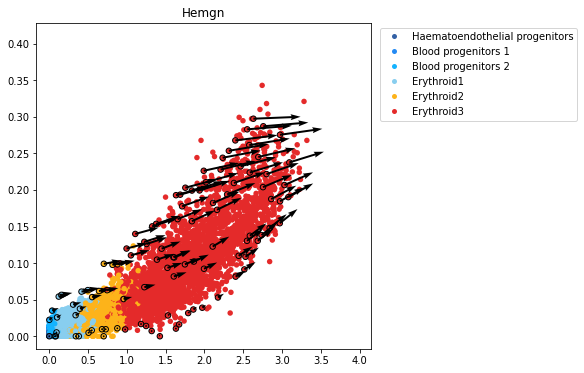

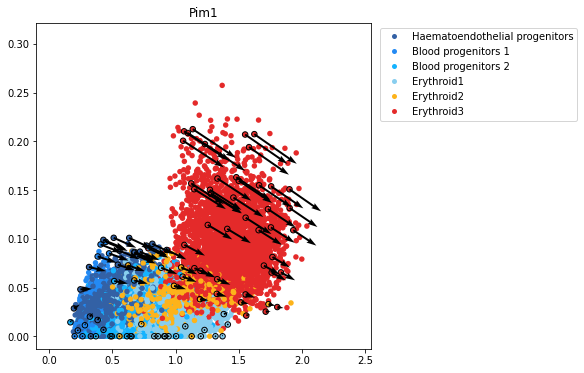

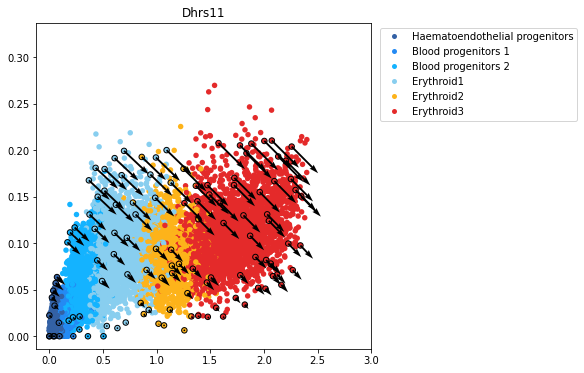

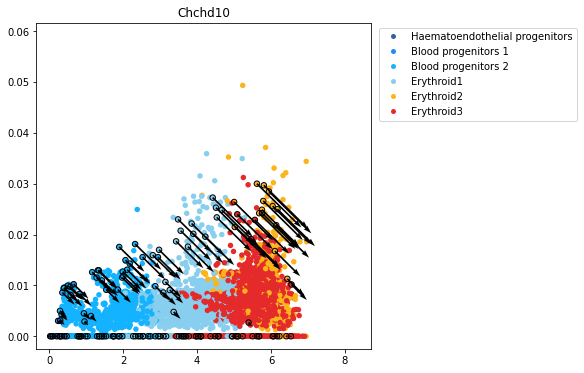

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

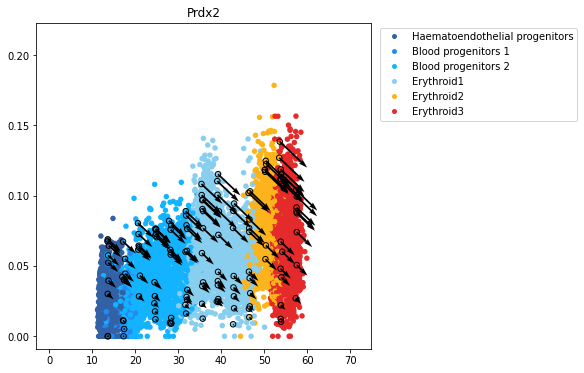

<Figure size 432x432 with 0 Axes>

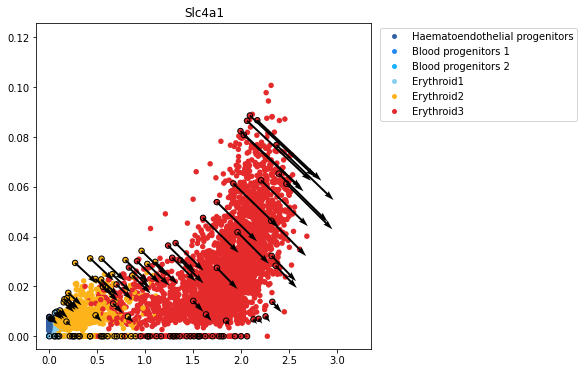

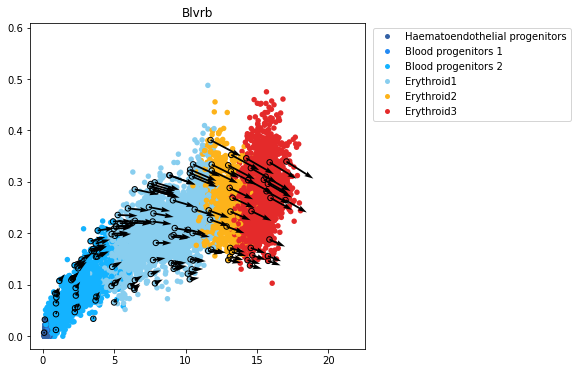

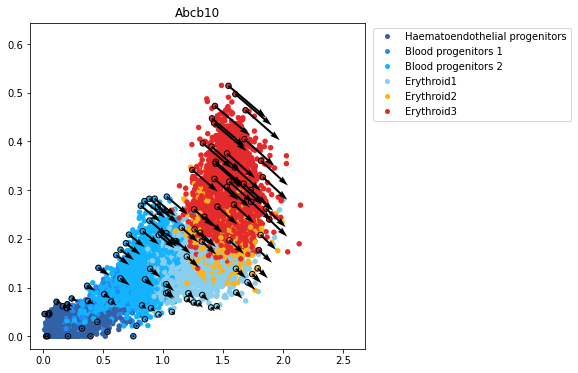

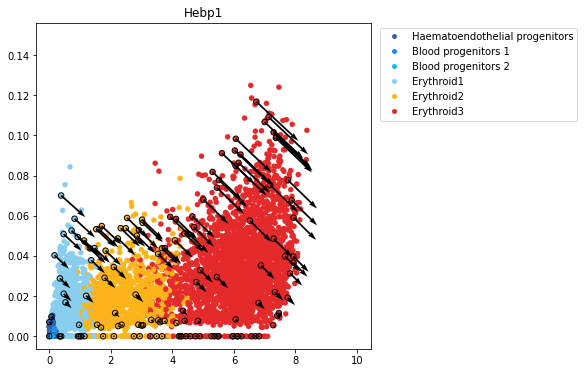

<Figure size 432x432 with 0 Axes>

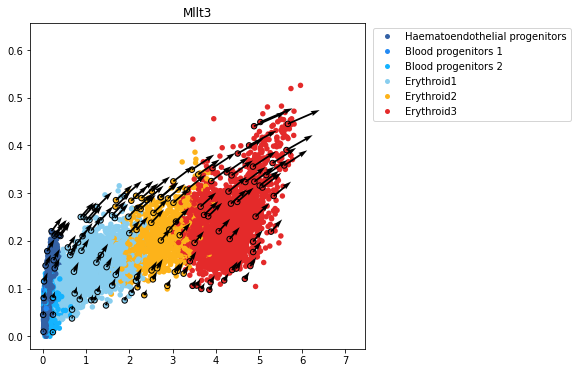

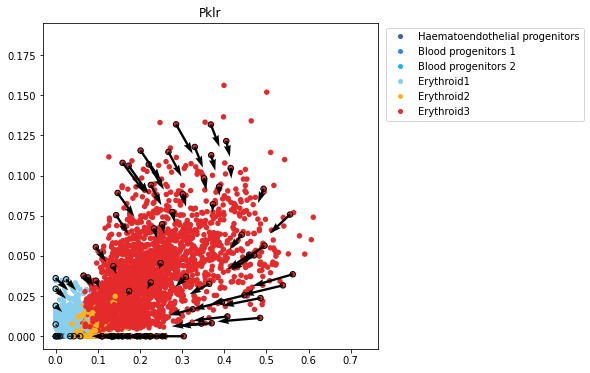

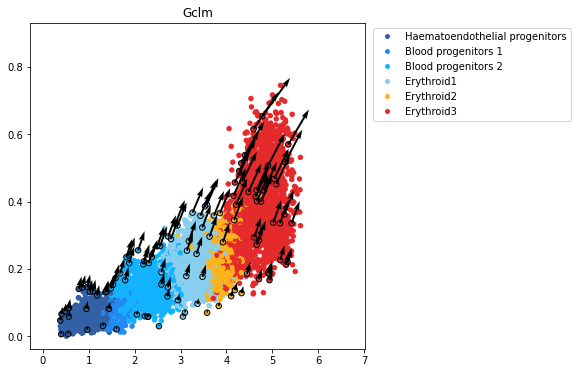

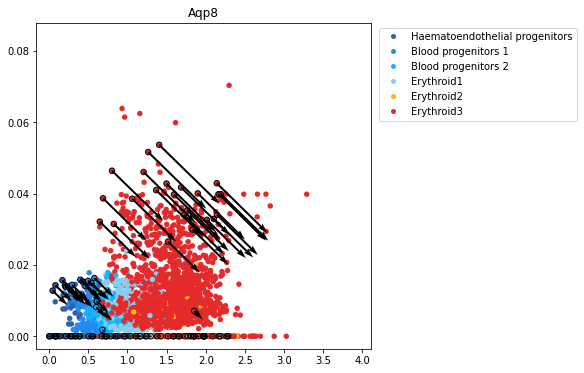

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

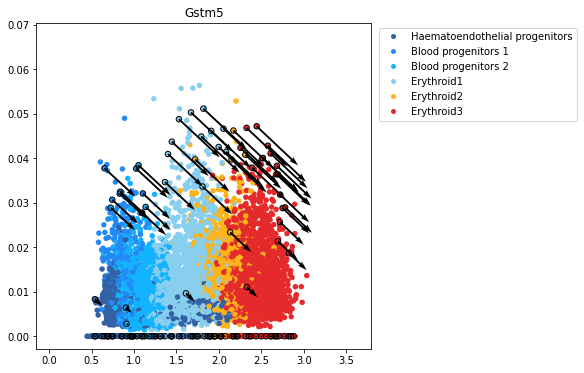

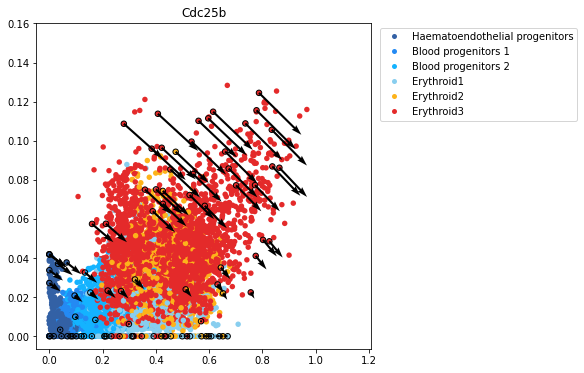

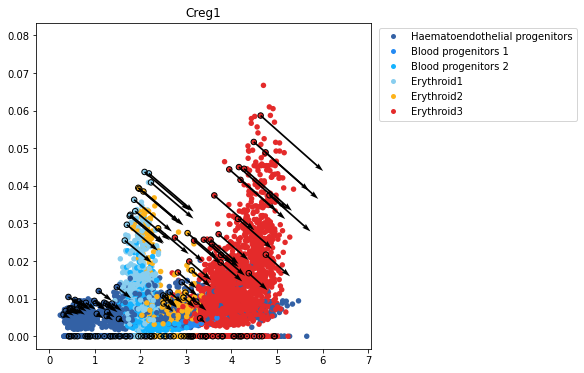

<Figure size 432x432 with 0 Axes>

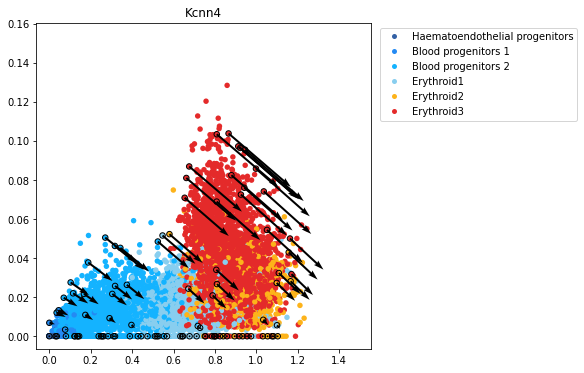

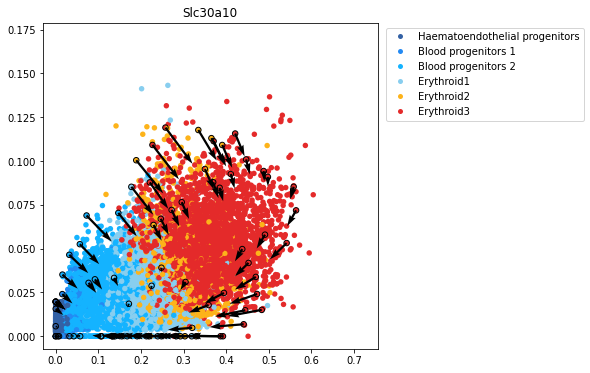

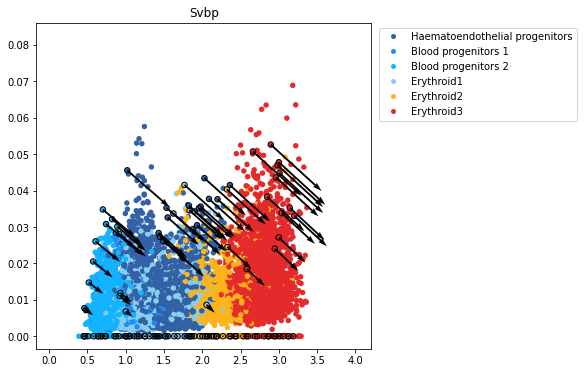

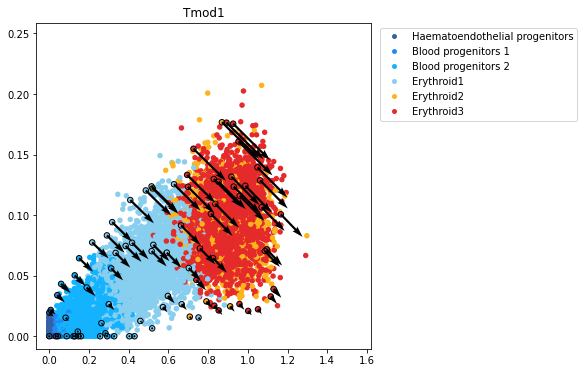

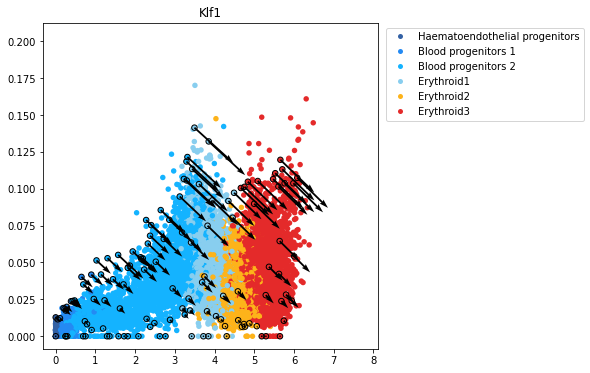

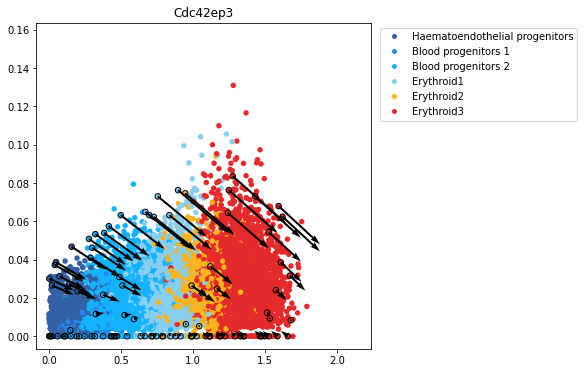

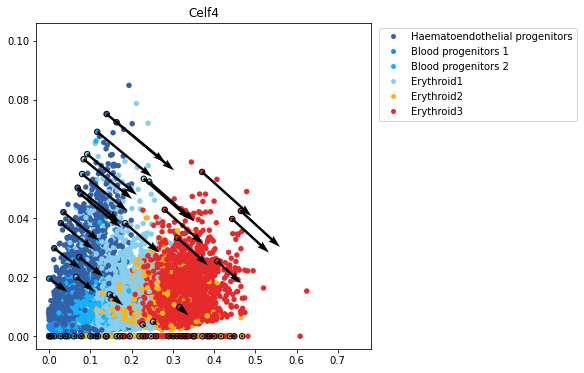

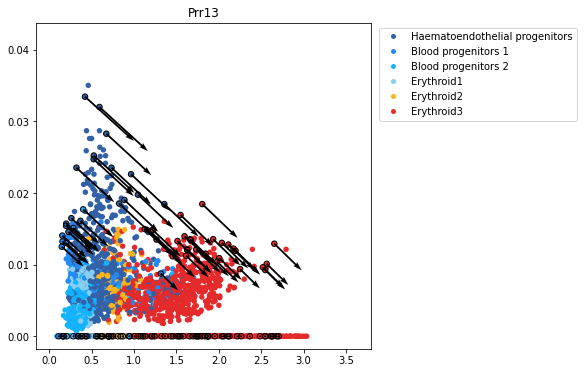

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

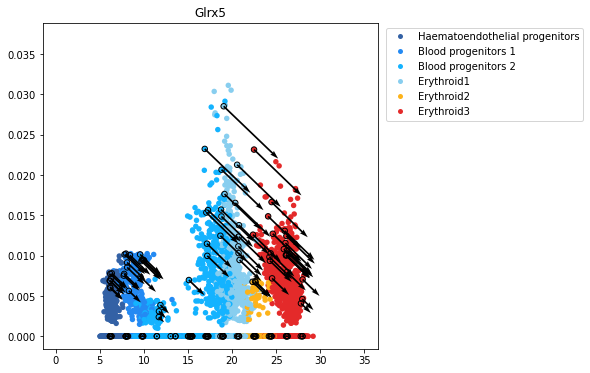

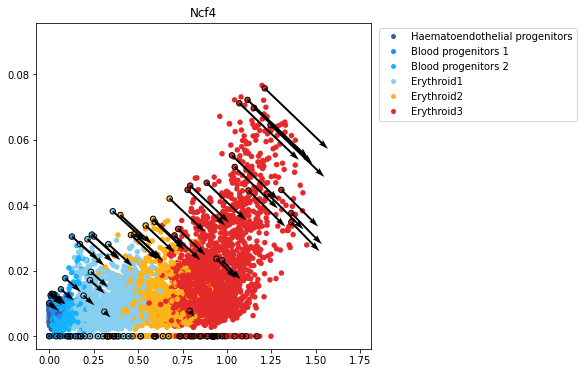

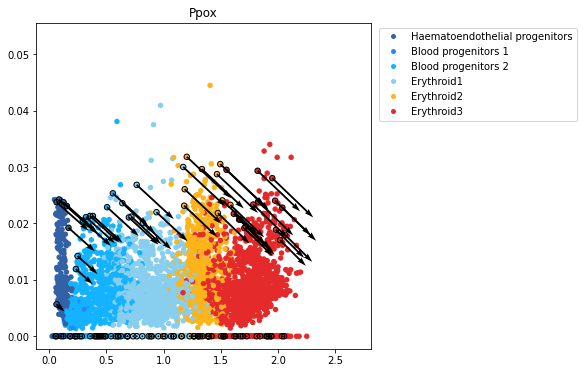

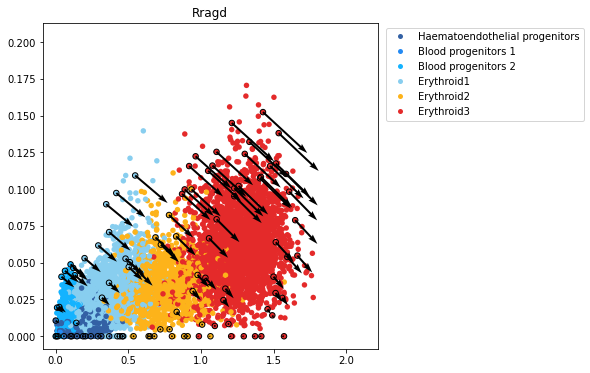

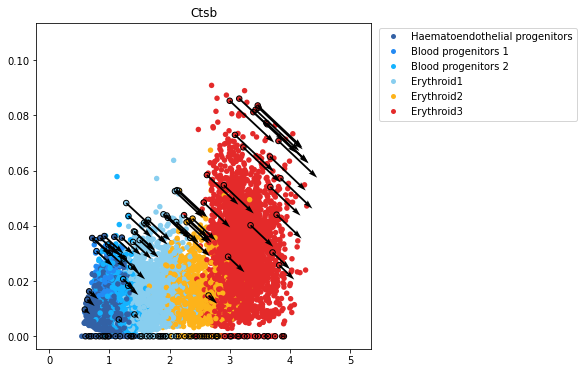

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

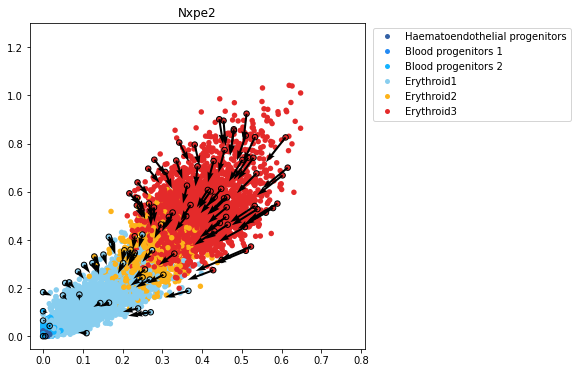

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

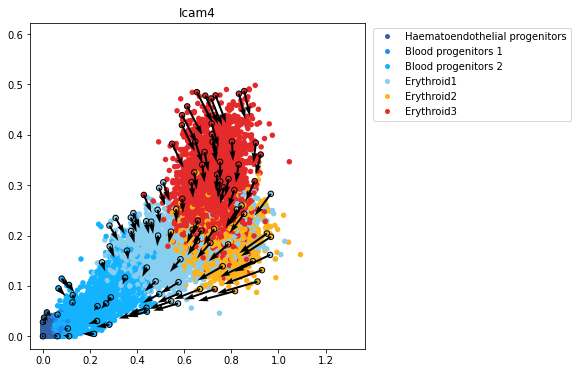

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

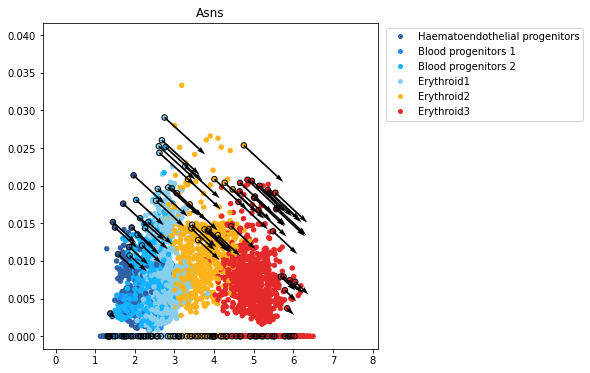

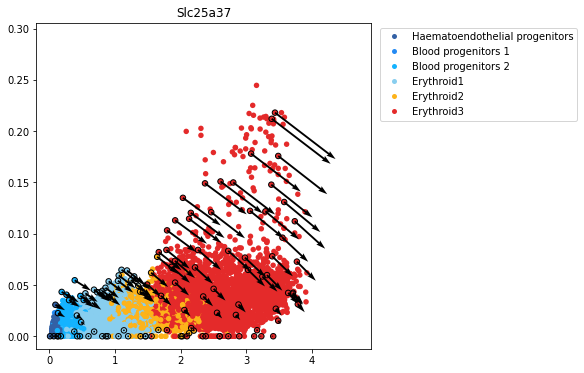

In [6]:
# gene velocity plot
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
for gene in musk_genes['index']:
    try:
        vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=output_path+'/'+gene+'.pdf')
    except:
        print("Exception: "+gene)


In [45]:
musk_genes

index        Δm  scaled Δm
0      Hba-x  0.004803   1.060738
1      Smim1  0.167618   0.543225
2       Dcxr  0.085737   0.528050
3     Cox6b2  0.204429   0.490225
4       Gypa  0.016467   0.487444
..       ...       ...        ...
84     Fuca2 -0.043663   0.012254
85     Kdm7a -0.051361   0.008452
86   Htatip2 -0.007389   0.007572
87      Asns -0.002351   0.004783
88  Slc25a37 -0.008083   0.001218

[89 rows x 3 columns]

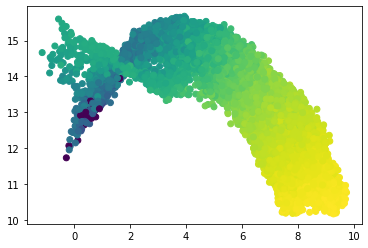

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')